In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('/content/Task 3 and 4_Loan_Data.csv')
df.head(10)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
5,4661159,0,5376.886873,7189.121298,85529.84591,2,697,0
6,8291909,1,3634.057471,7085.980095,68691.57707,6,722,0
7,4616950,4,3302.172238,13067.570210,50352.16821,3,545,1
8,3395789,0,2938.325123,1918.404472,53497.37754,4,676,0
9,4045948,0,5396.366774,5298.824524,92349.55399,2,447,0


In [3]:
df['payment_to_income'] = df['loan_amt_outstanding'] / df['income']
df ['debt_to_income'] = df['total_debt_outstanding'] / df['income']
df = df.drop(['customer_id', 'loan_amt_outstanding', 'total_debt_outstanding', 'income'], 1)
df.head()

<ipython-input-3-a7a0fa65c1b0>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['customer_id', 'loan_amt_outstanding', 'total_debt_outstanding', 'income'], 1)


,credit_lines_outstanding,years_employed,fico_score,default,payment_to_income,debt_to_income
0,0,5,605,0,0.066909,0.050173
1,5,2,572,1,0.073510,0.308789
2,0,4,602,0,0.051058,0.030787
3,0,5,612,0,0.064105,0.033645
4,1,6,631,0,0.057395,0.075435


In [4]:
features = df.columns
print(features)

Index(['credit_lines_outstanding', 'years_employed', 'fico_score', 'default',
       'payment_to_income', 'debt_to_income'],
      dtype='object')


In [5]:
corr_matrix = df.corr()
corr_matrix

,credit_lines_outstanding,years_employed,fico_score,default,payment_to_income,debt_to_income
credit_lines_outstanding,1.000000,-0.087900,-0.258177,0.862815,0.115691,0.957247
years_employed,-0.087900,1.000000,0.255873,-0.284506,-0.299698,-0.194562
fico_score,-0.258177,0.255873,1.000000,-0.324515,-0.042127,-0.256868
default,0.862815,-0.284506,-0.324515,1.000000,0.162815,0.852406
payment_to_income,0.115691,-0.299698,-0.042127,0.162815,1.000000,0.132254
debt_to_income,0.957247,-0.194562,-0.256868,0.852406,0.132254,1.000000


In [6]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [7]:
lb = 0.5
ub = 0.9
for index, row in corr_matrix.iterrows():
    for column in corr_matrix.columns:
        value = row[column]
        if ub <= value <= ub:
            print(f"Value {value} at index {index} in column {column} is within the range.")

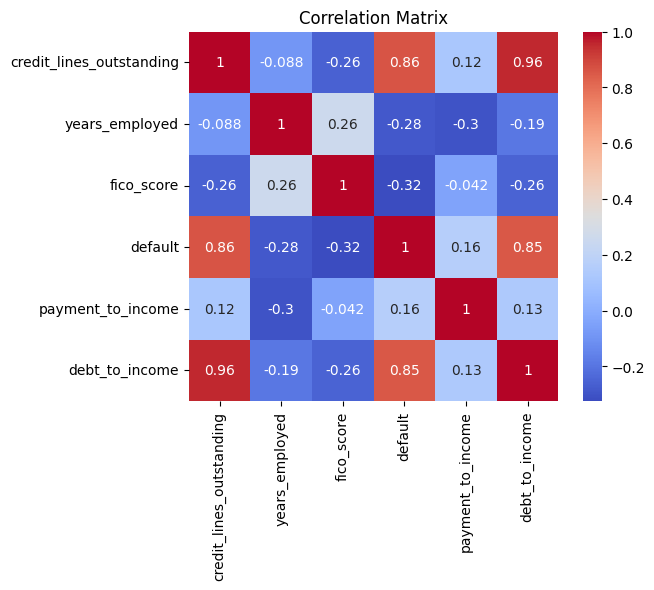

In [8]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [9]:
model = LogisticRegression(random_state=0, solver='liblinear', tol=1e-5, max_iter=10000).fit(df[features], df['default'])
print(model.coef_, model.intercept_)

[[ 3.18381535 -1.05539864 -0.01458228  6.55648304 -0.00679513  0.16683666]] [-0.25980277]


In [10]:
y_pred = model.predict(df[features])

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(df['default'], y_pred)
print((1.0*(abs(df['default'] - y_pred)).sum()) / len(df))
print(metrics.auc(fpr, tpr))

0.0
1.0
